<a href="https://colab.research.google.com/github/daniel-usp/MachineLearning/blob/main/03-Clusteriza%C3%A7%C3%A3o/An%C3%A1lise_de_Clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-means Clustering

## Introdução ao K-means

O **K-means** é um algoritmo de aprendizado de máquina não supervisionado usado para identificar agrupamentos (clusters) em um conjunto de dados. Ele agrupa os dados em K número de clusters, com base nas características dos dados, minimizando a variância dentro de cada cluster e maximizando a variância entre clusters diferentes.

## Aplicações em Finanças, Marketing e Negócios

### Finanças
- **Segmentação de Clientes para Investimentos**: Bancos e instituições financeiras podem usar K-means para segmentar clientes com base em seu comportamento de investimento, risco e preferências.
- **Detecção de Fraude**: Agrupar transações para identificar padrões incomuns que podem indicar fraude.

### Marketing
- **Segmentação de Mercado**: Identificar grupos de clientes com características semelhantes para campanhas de marketing direcionadas.
- **Análise de Comportamento do Cliente**: Entender diferentes grupos de clientes com base em seu histórico de compras e preferências.

### Negócios
- **Gestão de Inventário**: Agrupar produtos com base na demanda e características para otimizar o estoque.
- **Análise de Concorrência**: Agrupar concorrentes com base em características como preço, qualidade e mercado-alvo.

## Interpretando os Resultados dos Centroides

Após a aplicação do K-means, é crucial interpretar os centroides de cada cluster. Os centroides são os pontos centrais de cada cluster e representam as características médias dos dados dentro desse cluster. A interpretação dos centroides ajuda a entender as características que definem cada grupo e como eles se diferem entre si.

Por exemplo, em uma segmentação de mercado, um cluster pode ter um centroide com alta renda e alta frequência de compras, enquanto outro pode representar clientes com renda mais baixa e compras menos frequentes.

## Exemplo de Código em Python

```python
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# Exemplo de dados
data = pd.DataFrame({
    'Renda': [50000, 60000, 80000, 30000, 40000, 70000],
    'Frequencia_de_Compras': [30, 22, 45, 10, 15, 40]
})

# Aplicando K-means
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(data)

# Plotando os clusters
plt.scatter(data['Renda'], data['Frequencia_de_Compras'], c=clusters)
plt.xlabel('Renda')
plt.ylabel('Frequência de Compras')
plt.title('Exemplo de Segmentação de Mercado usando K-means')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


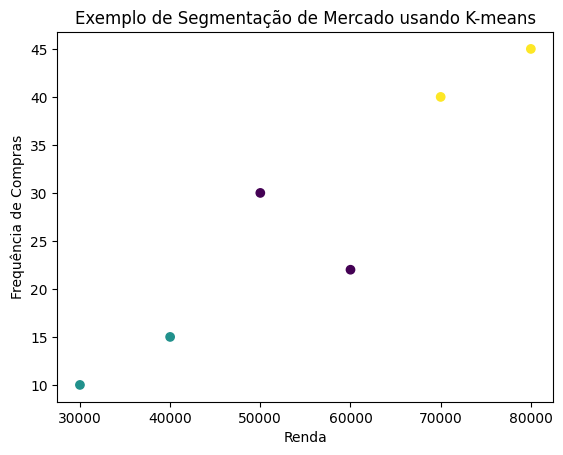

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# Exemplo de dados
data = pd.DataFrame({
    'Renda': [50000, 60000, 80000, 30000, 40000, 70000],
    'Frequencia_de_Compras': [30, 22, 45, 10, 15, 40]
})

# Aplicando K-means
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(data)

# Plotando os clusters
plt.scatter(data['Renda'], data['Frequencia_de_Compras'], c=clusters)
plt.xlabel('Renda')
plt.ylabel('Frequência de Compras')
plt.title('Exemplo de Segmentação de Mercado usando K-means')
plt.show()


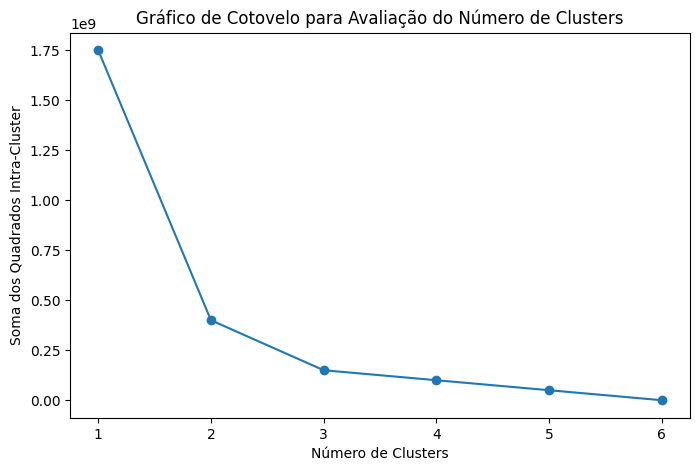

In [2]:
# Tentando novamente com um intervalo de clusters ajustado e definindo n_init explicitamente
soma_quadrados = []
for i in range(1, len(data) + 1):  # O número máximo de clusters é igual ao número de amostras
    kmeans = KMeans(n_clusters=i, n_init=10)
    kmeans.fit(data)
    soma_quadrados.append(kmeans.inertia_)

# Plotando o gráfico de cotovelo
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(data) + 1), soma_quadrados, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Soma dos Quadrados Intra-Cluster')
plt.title('Gráfico de Cotovelo para Avaliação do Número de Clusters')
plt.show()



## Perguntar para o ChatGPT (Referência para o K-Means)
### Completar com código os #s do código a seguir

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.express as px

# Lendo o banco de dados
fonte = 'https://raw.githubusercontent.com/daniel-usp/LIT/master/Supermercados.csv'
df = pd.read_csv(fonte)
df= df.drop("Empresa", axis =1)

# Normalizando as variáveis


# Calculando a soma dos quadrados intra-cluster para o gráfico de cotovelo


# Limitando o gráfico de cotovelo para evitar erros


# Adicionando os resultados dos clusters (K=3) ao DataFrame original


# Salvando o DataFrame com os clusters no Excel

# Imprimir os centróides dos grupos K e a quantidade de amostras em cada cluster em formato DataFrame.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


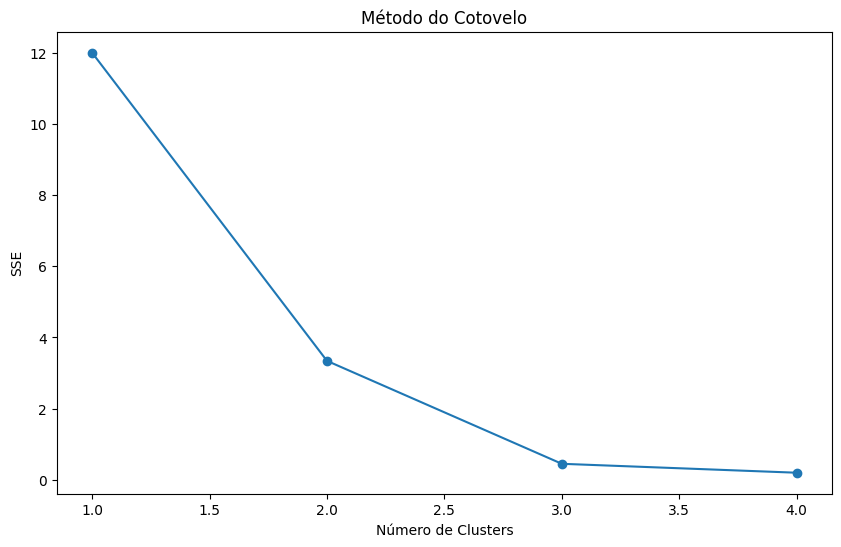

Centróides dos Clusters com Contagem de Amostras:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Vendas,Empregados,Count
0,790.80,7482.0,2
1,319.85,1405.5,2
2,1801.25,9476.5,2


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.express as px

# Lendo o banco de dados
fonte = 'https://raw.githubusercontent.com/daniel-usp/LIT/master/Supermercados.csv'
df = pd.read_csv(fonte)
df= df.drop("Empresas", axis =1)

# Normalizando as variáveis
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df)

# Calculando a soma dos quadrados intra-cluster para o gráfico de cotovelo
sse = []
for k in range(1, 5):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_normalized)
    sse.append(kmeans.inertia_)

# Limitando o gráfico de cotovelo para evitar erros
plt.figure(figsize=(10, 6))
plt.plot(range(1, 5), sse, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('SSE')
plt.show()

# Adicionando os resultados dos clusters (K=3) ao DataFrame original
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_normalized)
df['Cluster'] = kmeans.labels_

# Salvando o DataFrame com os clusters no Excel
df.to_excel('supermercados_clusters.xlsx', index=False)

# Imprimir os centróides dos grupos K para interpretação dos clusters em formato DataFrame
# e também inserir em uma coluna a quantidade de amostras em cada cluster.
centroids_df = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=df.columns[:-1])
cluster_counts = df['Cluster'].value_counts().sort_index()
centroids_df['Count'] = cluster_counts.values
print("Centróides dos Clusters com Contagem de Amostras:")
centroids_df





## Dados Fianceiros da Revista Exame

In [8]:
import pandas as pd

fonte = 'https://raw.githubusercontent.com/daniel-usp/LIT/master/500MM.csv'
df = pd.read_csv(fonte,sep = ";", decimal = ",")
df = df.drop("Empresa", axis =1)
df.head()

# Normalizando as variáveis


# Calculando a soma dos quadrados intra-cluster para o gráfico de cotovelo


# Limitando o gráfico de cotovelo para evitar erros


# Adicionando os resultados dos clusters (K=3) ao DataFrame original


# Salvando o DataFrame com os clusters no Excel

# Imprimir os centróides dos grupos K e a quantidade de amostras em cada cluster em formato DataFrame


,Vendas,Rentabilidade,Liquidezgeral,Endividamentogeral
0,47855158,21.938,1.0756,52.484
1,13531695,10.528,1.2175,54.189
2,7696136,7.836,0.4218,55.977
3,7256514,14.137,0.6093,38.128
4,7055807,10.649,0.6162,66.055


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

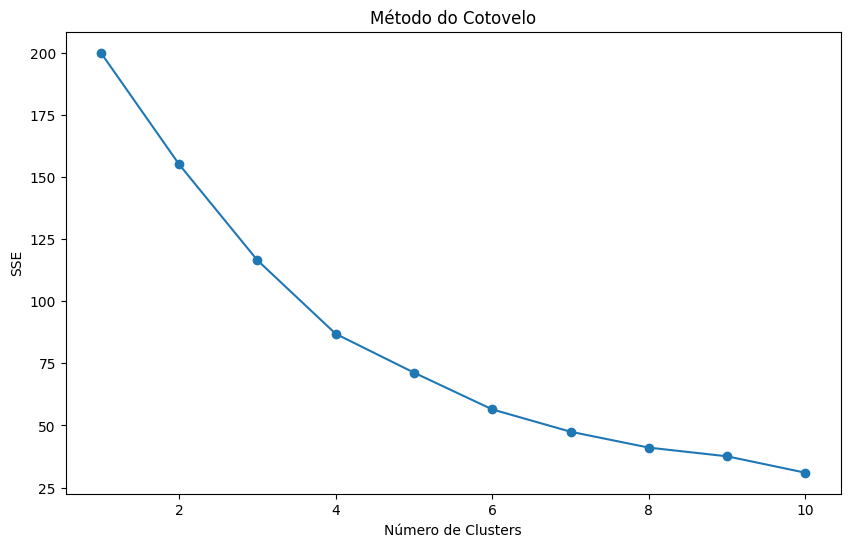

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Centróides dos Clusters com Contagem de Amostras:


,Vendas,Rentabilidade,Liquidezgeral,Endividamentogeral,Count
0,3.060119e+06,29.031875,0.545112,76.787625,8
1,1.709705e+06,-3.406000,1.365743,47.918429,7
2,3.300893e+06,18.895273,0.934114,58.529955,22
3,3.558978e+06,8.343917,0.475017,44.443333,12
4,4.785516e+07,21.938000,1.075600,52.484000,1


In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Leitura dos dados
fonte = 'https://raw.githubusercontent.com/daniel-usp/LIT/master/500MM.csv'
df = pd.read_csv(fonte, sep=";", decimal=",")
df = df.drop("Empresa", axis=1)

# Normalizando as variáveis
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df)

# Calculando a soma dos quadrados intra-cluster para o gráfico de cotovelo
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_normalized)
    sse.append(kmeans.inertia_)

# Limitando o gráfico de cotovelo para evitar erros
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('SSE')
plt.show()

# Adicionando os resultados dos clusters (K=3) ao DataFrame original
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df_normalized)
df['Cluster'] = kmeans.labels_

# Salvando o DataFrame com os clusters no Excel
df.to_excel('clusters.xlsx', index=False)

# Imprimir os centróides dos grupos K para interpretação dos clusters em formato DataFrame
centroids_df = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=df.columns[:-1])
cluster_counts = df['Cluster'].value_counts().sort_index()
centroids_df['Count'] = cluster_counts.values
print("Centróides dos Clusters com Contagem de Amostras:")
centroids_df
